<a href="https://colab.research.google.com/github/moupriya20/mou_m/blob/main/Image_Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [2]:
# Load MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
noise_factor = 0.4

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip to valid pixel range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [4]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

# Bottleneck
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=8,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 211ms/step - loss: 0.2839 - val_loss: 0.0992
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 210ms/step - loss: 0.0971 - val_loss: 0.0950
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 209ms/step - loss: 0.0942 - val_loss: 0.0938
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 208ms/step - loss: 0.0932 - val_loss: 0.0927
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 204ms/step - loss: 0.0919 - val_loss: 0.0917
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 205ms/step - loss: 0.0911 - val_loss: 0.0910
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 76s 204ms/step - loss: 0.0904 - val_loss: 0.0904
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 207ms/step - loss: 0.0899 - val_loss: 0.0899


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


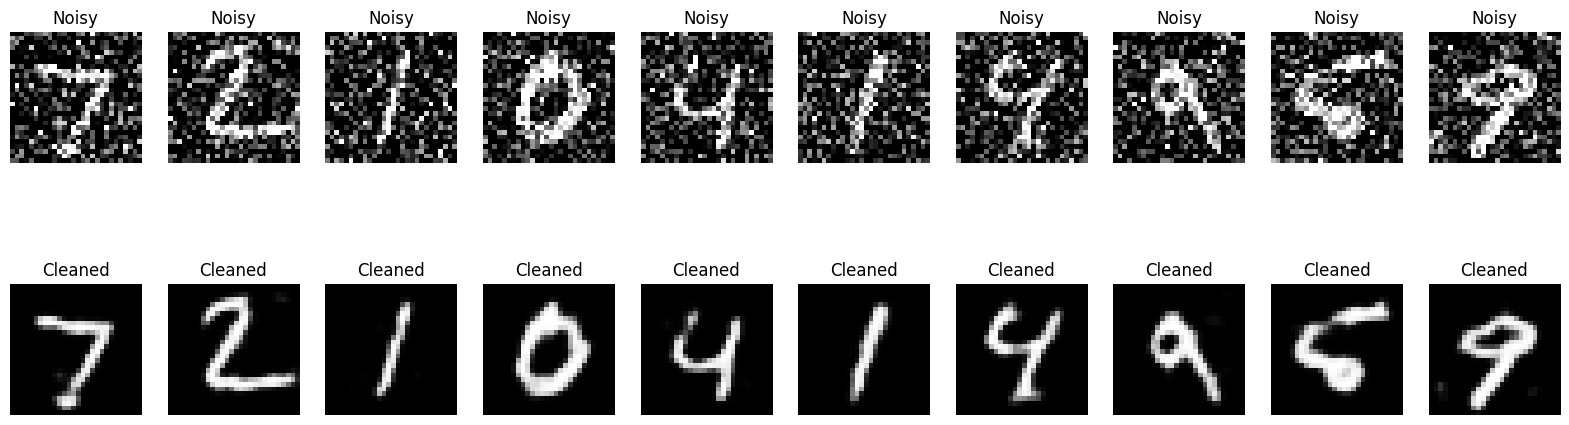

In [6]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Cleaned")
    plt.axis('off')

plt.show()
